#### Mobile Price_Range Classification

1) Read the 'train.csv' dataset<br>
2) Remove/handle null values if any<br>
3) Select price_range column a s dependent feature and the remaining columns as dependent 
feature, split the data into training and test data with test data size as 25%<br>
4) Apply the following Algos on training data and generate the prediction on test data.<br>
a) Decision Tree<br>
b) Random Forest<br>
c) SVM with linear kernel<br>
d) Gaussian NB<br>
5) Generate confusion matrix and classification report for each algo used in Q4)<br>
6) Based on the Testing Accuracy, select the algo with its highest value and use it to build a model and train it on the entire 'train.csv' dataset.<br>
7) Read the 'test.csv' dataset<br>
8) Remove null values if any<br>
9) Apply the model built in Q6) and generate predictions for the test data.<br>
10) Create a new column in the test data as 'Pred_Price_Range' and populate it with the
predicted values generated in Q9)<br>
11) Depict the count of predicted values in the 'test.csv' dataset on a bar chart and its precentage distribution on a pie chart separately.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
df.shape

(2000, 21)

In [6]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [7]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [9]:
print(x.shape)
y.shape

(2000, 20)


(2000,)

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25)

In [11]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1500, 20)
(1500,)
(500, 20)
(500,)


In [65]:
from sklearn.metrics import classification_report,confusion_matrix

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

### Logistic Regression

In [18]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

C:\Users\ABHIS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.648

In [77]:
lr_pred=lr.predict(x_test)

In [78]:
print(confusion_matrix(y_test,lr_pred))
print(classification_report(y_test,lr_pred))

[[97 20  2  0]
 [21 76 31  9]
 [ 1 24 55 39]
 [ 0  0 29 96]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       119
           1       0.63      0.55      0.59       137
           2       0.47      0.46      0.47       119
           3       0.67      0.77      0.71       125

    accuracy                           0.65       500
   macro avg       0.65      0.65      0.65       500
weighted avg       0.65      0.65      0.65       500



### Decision Tree

In [23]:
from sklearn.model_selection import cross_val_score

values for max_depth , min_samples_split are derived from cross_val_score

In [35]:
dt=DecisionTreeClassifier(criterion='gini',max_depth=7,min_samples_split=3)
dt.fit(x_train,y_train)
dt.score(x_test,y_test)

0.842

In [36]:
for i in range(3,10):
    score=cross_val_score(DecisionTreeClassifier(criterion='gini',max_depth=i),x,y)
    print(f'At max_depth={i}, accuracy is {score.mean()}')

At max_depth=3, accuracy is 0.7575000000000001
At max_depth=4, accuracy is 0.795
At max_depth=5, accuracy is 0.8205
At max_depth=6, accuracy is 0.8285
At max_depth=7, accuracy is 0.8385
At max_depth=8, accuracy is 0.8314999999999999
At max_depth=9, accuracy is 0.8324999999999999


In [37]:
for i in range(3,10):
    score=cross_val_score(DecisionTreeClassifier(criterion='gini',min_samples_split=i,max_depth=7),x,y)
    print(f'At max_depth={i}, accuracy is {score.mean()}')

At max_depth=3, accuracy is 0.836
At max_depth=4, accuracy is 0.8365
At max_depth=5, accuracy is 0.8390000000000001
At max_depth=6, accuracy is 0.8310000000000001
At max_depth=7, accuracy is 0.8320000000000001
At max_depth=8, accuracy is 0.8280000000000001
At max_depth=9, accuracy is 0.8335000000000001


In [75]:
dt_pred=dt.predict(x_test)

In [76]:
print(confusion_matrix(y_test,dt_pred))
print(classification_report(y_test,dt_pred))

[[113   6   0   0]
 [ 13 110  14   0]
 [  0  16  87  16]
 [  0   0  14 111]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       119
           1       0.83      0.80      0.82       137
           2       0.76      0.73      0.74       119
           3       0.87      0.89      0.88       125

    accuracy                           0.84       500
   macro avg       0.84      0.84      0.84       500
weighted avg       0.84      0.84      0.84       500



### Random Forest

In [48]:
rf=RandomForestClassifier(n_estimators=90,max_depth=11)
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

0.872

In [41]:
for i in range(5,110,5):
    rf_score=cross_val_score(RandomForestClassifier(n_estimators=i),x,y)
    print(f'At n={i},accuracy is {rf_score.mean()}')

At n=5,accuracy is 0.7619999999999999
At n=10,accuracy is 0.7855
At n=15,accuracy is 0.8295
At n=20,accuracy is 0.835
At n=25,accuracy is 0.8540000000000001
At n=30,accuracy is 0.8469999999999999
At n=35,accuracy is 0.861
At n=40,accuracy is 0.8554999999999999
At n=45,accuracy is 0.8655000000000002
At n=50,accuracy is 0.8640000000000001
At n=55,accuracy is 0.8674999999999999
At n=60,accuracy is 0.869
At n=65,accuracy is 0.8724999999999999
At n=70,accuracy is 0.868
At n=75,accuracy is 0.8695
At n=80,accuracy is 0.8805
At n=85,accuracy is 0.8755
At n=90,accuracy is 0.885
At n=95,accuracy is 0.8744999999999999
At n=100,accuracy is 0.8799999999999999
At n=105,accuracy is 0.8779999999999999


In [47]:
for i in range(2,16):
    rf_score=cross_val_score(RandomForestClassifier(n_estimators=90,max_depth=i),x,y)
    print(f'At n={i},accuracy is {rf_score.mean()}')

At n=2,accuracy is 0.731
At n=3,accuracy is 0.8035
At n=4,accuracy is 0.813
At n=5,accuracy is 0.8275
At n=6,accuracy is 0.851
At n=7,accuracy is 0.8664999999999999
At n=8,accuracy is 0.8690000000000001
At n=9,accuracy is 0.8654999999999999
At n=10,accuracy is 0.8734999999999999
At n=11,accuracy is 0.8765000000000001
At n=12,accuracy is 0.8709999999999999
At n=13,accuracy is 0.875
At n=14,accuracy is 0.8734999999999999
At n=15,accuracy is 0.877


In [49]:
for i in range(2,16):
    rf_score=cross_val_score(RandomForestClassifier(n_estimators=90,max_depth=11,min_samples_split=i),x,y)
    print(f'At n={i},accuracy is {rf_score.mean()}')

At n=2,accuracy is 0.8719999999999999
At n=3,accuracy is 0.8705
At n=4,accuracy is 0.8734999999999999
At n=5,accuracy is 0.873
At n=6,accuracy is 0.8785000000000001
At n=7,accuracy is 0.8699999999999999
At n=8,accuracy is 0.8745
At n=9,accuracy is 0.8645000000000002
At n=10,accuracy is 0.8665
At n=11,accuracy is 0.8775000000000001
At n=12,accuracy is 0.8714999999999999
At n=13,accuracy is 0.8674999999999999
At n=14,accuracy is 0.8705
At n=15,accuracy is 0.8619999999999999


In [73]:
rf_pred=rf.predict(x_test)

In [74]:
print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred))

[[114   5   0   0]
 [ 11 113  13   0]
 [  0  18  92   9]
 [  0   0   8 117]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       119
           1       0.83      0.82      0.83       137
           2       0.81      0.77      0.79       119
           3       0.93      0.94      0.93       125

    accuracy                           0.87       500
   macro avg       0.87      0.87      0.87       500
weighted avg       0.87      0.87      0.87       500



### SVM

In [62]:
svm=SVC(kernel='linear',C=0.01)
svm.fit(x_train,y_train)
svm.score(x_test,y_test)

0.974

In [66]:
svm_pred=svm.predict(x_test)

In [61]:
ac=[0.001,0.01,0.1,1,10]
for i in ac:
    svm_score=cross_val_score(SVC(kernel='linear',C=i),x,y)
    print(f'At C={i},accuracy is {svm_score.mean()}')

At C=0.001,accuracy is 0.975
At C=0.01,accuracy is 0.9775
At C=0.1,accuracy is 0.9734999999999999
At C=1,accuracy is 0.9730000000000001
At C=10,accuracy is 0.97


In [72]:
print(confusion_matrix(y_test,svm_pred))
print(classification_report(y_test,svm_pred))

[[119   0   0   0]
 [  3 131   3   0]
 [  0   5 114   0]
 [  0   0   2 123]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       119
           1       0.96      0.96      0.96       137
           2       0.96      0.96      0.96       119
           3       1.00      0.98      0.99       125

    accuracy                           0.97       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500



### Naive Bayes

In [82]:
nb=GaussianNB()
nb.fit(x_train,y_train)
nb.score(x_test,y_test)

0.796

In [85]:
nb_pred=nb.predict(x_test)

In [86]:
print(confusion_matrix(y_test,nb_pred))
print(classification_report(y_test,nb_pred))

[[107  12   0   0]
 [ 13  99  25   0]
 [  0  28  82   9]
 [  0   0  15 110]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       119
           1       0.71      0.72      0.72       137
           2       0.67      0.69      0.68       119
           3       0.92      0.88      0.90       125

    accuracy                           0.80       500
   macro avg       0.80      0.80      0.80       500
weighted avg       0.80      0.80      0.80       500



 ## Based on the Testing Accuracy, select the algo with its highest value and use it to build a model and train it on the entire 'train.csv' dataset.

In [88]:
model=SVC(kernel='linear',C=.01)
model.fit(x,y)

SVC(C=0.01, kernel='linear')

In [89]:
model.score(x_train,y_train)

0.988

In [90]:
test=pd.read_csv('test.csv')

In [100]:
test_new=test.iloc[:,1:]

In [101]:
test_new.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [102]:
model_pred=model.predict(test_new)

In [103]:
model.score(x_test,y_test)

0.978

In [106]:
model_pred[:5]

array([3, 3, 2, 3, 1], dtype=int64)

In [109]:
test['price_pred']=model.predict(test_new)

In [110]:
test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_pred
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,226,1412,3476,12,7,2,0,1,0,3
1,2,841,1,0.5,1,4,1,61,0.8,191,...,746,857,3895,6,0,7,1,0,0,3
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,1270,1366,2396,17,10,10,0,1,1,2
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,295,1752,3893,10,0,7,1,1,0,3
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,749,810,1773,15,8,7,1,0,1,1


In [113]:
d1=test['price_pred'].value_counts()

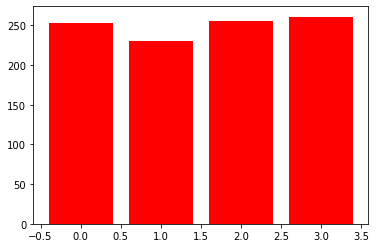

In [116]:
plt.bar(d1.index,d1.values,color='red')
plt.show()

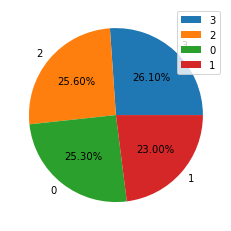

In [123]:
plt.pie(d1,labels=d1.index,autopct='%.2f%%')
plt.legend()
plt.show()